In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
%matplotlib inline

In [111]:
df = pd.read_csv('.//Team Frames//avalanche.csv')
other_csvs = ['.//Team Frames//blackhawks.csv', './/Team Frames//bluejackets.csv', './/Team Frames//blues.csv', './/Team Frames//bruins.csv', './/Team Frames//canadiens.csv',
'.//Team Frames//canucks.csv', './/Team Frames//capitals.csv', './/Team Frames//coyotes.csv', './/Team Frames//devils.csv', './/Team Frames//ducks.csv',
'.//Team Frames//flames.csv', './/Team Frames//flyers.csv', './/Team Frames//goldenknights.csv', './/Team Frames//hurricanes.csv', './/Team Frames//islanders.csv',
'.//Team Frames//jets.csv', './/Team Frames//kings.csv', './/Team Frames//kraken.csv', './/Team Frames//leafs.csv', './/Team Frames//lightning.csv',
'.//Team Frames//oilers.csv', './/Team Frames//panthers.csv', './/Team Frames//penguins.csv', './/Team Frames//predators.csv', './/Team Frames//rangers.csv',
'.//Team Frames//redwings.csv', './/Team Frames//sabres.csv', './/Team Frames//senators.csv', './/Team Frames//sharks.csv', './/Team Frames//stars.csv',
'.//Team Frames//thrashers.csv', './/Team Frames//wild.csv']

for csv in other_csvs:
    temp = pd.read_csv(csv)
    df = pd.concat([df, temp])


df.dropna(inplace=True)
df.reset_index(inplace=True)
df['date'] = df['date'].apply(lambda x: pd.to_datetime(x[0:10], format='%Y/%m/%d'))
df.drop(columns=['points', 'goals_against', 'power_play', 'penalty_kill', 'shots', 'shots_against', 'FOWp', 'index'], inplace=True)
df.tail()

,team,date,goals,opponent,identifier,rolling_points_5,rolling_points_10,rolling_points_20,rolling_goals_5,rolling_goals_10,rolling_ga_5,rolling_ga_10,rolling_pp_5,rolling_pk_5,rolling_shots_5,rolling_sa_5,rolling_fow_5,rolling_ga_sum,rolling_sa_sum,rolling_svp_5
36863,Minnesota Wild,2022-04-22,6,Seattle Kraken,vs,1.8,1.6,1.65,4.2,4.2,3.0,3.0,15.66,88.34,30.6,29.2,46.20,15.0,146.0,0.897260
36864,Minnesota Wild,2022-04-24,5,Nashville Predators,@,1.8,1.6,1.75,4.8,4.3,3.2,3.2,23.66,85.00,32.2,27.6,49.50,16.0,138.0,0.884058
36865,Minnesota Wild,2022-04-26,3,Arizona Coyotes,vs,2.0,1.8,1.75,4.8,4.6,2.8,3.0,22.72,82.00,34.4,26.6,51.78,14.0,133.0,0.894737
36866,Minnesota Wild,2022-04-28,3,Calgary Flames,vs,1.6,1.7,1.65,4.4,4.6,3.0,3.1,22.72,77.00,36.4,25.8,49.52,15.0,129.0,0.883721
36867,Minnesota Wild,2022-04-29,4,Colorado Avalanche,vs,1.6,1.7,1.65,4.6,4.3,3.4,3.0,37.72,77.00,35.4,27.2,51.90,17.0,136.0,0.875000


In [112]:
df.rolling_points_5 = df.rolling_points_5 / 2
df.rolling_points_10 = df.rolling_points_10 / 2
df.rolling_points_20 = df.rolling_points_20 / 2
df.rolling_pp_5 = df.rolling_pp_5 / 100
df.rolling_pk_5 = df.rolling_pk_5 / 100
df.rolling_fow_5 = df.rolling_fow_5 / 100

In [113]:
df_home = df[df['identifier'] == 'vs']
df_home.drop(columns=['identifier'], inplace=True)
df_away = df[df['identifier'] == '@']
df_away.drop(columns=['identifier'], inplace=True)

merged_df = pd.merge(df_home, df_away, how='left', left_on=['date', 'opponent'], right_on=['date', 'team'])
merged_df.drop(columns=['opponent_x', 'opponent_y'], inplace=True)
merged_df.head(10)

c:\Users\cbarg\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,team_x,date,goals_x,rolling_points_5_x,rolling_points_10_x,rolling_points_20_x,rolling_goals_5_x,rolling_goals_10_x,rolling_ga_5_x,rolling_ga_10_x,...,rolling_ga_5_y,rolling_ga_10_y,rolling_pp_5_y,rolling_pk_5_y,rolling_shots_5_y,rolling_sa_5_y,rolling_fow_5_y,rolling_ga_sum_y,rolling_sa_sum_y,rolling_svp_5_y
0,Colorado Avalanche,2005-11-21,2,0.4,0.65,0.600,2.8,3.4,3.4,3.0,...,2.8,2.0,0.2708,0.7056,33.8,25.2,0.5246,14.0,126.0,0.888889
1,Colorado Avalanche,2005-11-27,6,0.5,0.55,0.575,3.2,3.4,3.0,3.1,...,2.4,2.4,0.1100,0.8120,28.4,30.0,0.4410,12.0,150.0,0.920000
2,Colorado Avalanche,2005-12-04,4,0.6,0.55,0.650,3.8,3.2,3.2,3.0,...,2.4,2.5,0.2072,0.8472,28.8,27.6,0.5102,12.0,138.0,0.913043
3,Colorado Avalanche,2005-12-07,4,0.6,0.55,0.600,4.0,3.4,3.0,3.1,...,3.2,3.2,0.1202,0.7700,24.8,35.8,0.5178,16.0,179.0,0.910615
4,Colorado Avalanche,2005-12-12,2,0.4,0.55,0.600,3.2,3.5,3.8,3.2,...,2.2,2.2,0.2050,0.8310,28.0,30.4,0.4890,11.0,152.0,0.927632
5,Colorado Avalanche,2005-12-22,4,0.2,0.40,0.475,2.6,2.9,3.8,3.6,...,2.6,2.3,0.2360,0.9666,27.8,31.4,0.4942,13.0,157.0,0.917197
6,Colorado Avalanche,2005-12-26,7,0.4,0.40,0.475,3.0,3.1,3.4,3.7,...,3.0,3.3,0.1400,0.8014,25.8,25.6,0.5020,15.0,128.0,0.882812
7,Colorado Avalanche,2005-12-28,3,0.6,0.50,0.525,3.6,3.4,3.2,3.5,...,2.8,2.5,0.1486,0.7716,28.2,27.6,0.4542,14.0,138.0,0.898551
8,Colorado Avalanche,2006-01-03,3,0.4,0.40,0.475,4.0,3.4,4.2,3.9,...,3.8,3.5,0.1644,0.7728,30.2,33.6,0.5162,19.0,168.0,0.886905
9,Colorado Avalanche,2006-01-07,2,0.6,0.60,0.550,3.4,3.5,2.8,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
merged_df['rolling_points_10_div'] = merged_df.rolling_points_10_x / merged_df.rolling_points_10_y
merged_df['rolling_points_20_div'] = merged_df.rolling_points_20_x / merged_df.rolling_points_20_y
merged_df['rolling_goals_5_div'] = merged_df.rolling_goals_5_x / merged_df.rolling_goals_5_y
merged_df['rolling_goals_10_div'] = merged_df.rolling_goals_10_x / merged_df.rolling_goals_10_y
merged_df['rolling_ga_5_div'] = merged_df.rolling_ga_5_y / merged_df.rolling_ga_5_x #reversed so that a higher number means home team is better in that area
merged_df['rolling_ga_10_div'] = merged_df.rolling_ga_10_y / merged_df.rolling_ga_10_x #reversed so that a higher number means home team is better in that area
merged_df['rolling_pp_5_div'] = merged_df.rolling_pp_5_x - merged_df.rolling_pp_5_y
merged_df['rolling_pk_5_div'] = merged_df.rolling_pk_5_x / merged_df.rolling_pk_5_y
merged_df['rolling_shots_5_div'] = merged_df.rolling_shots_5_x / merged_df.rolling_shots_5_y
merged_df['rolling_sa_5_div'] = merged_df.rolling_sa_5_y / merged_df.rolling_sa_5_x #reversed so that a higher number means home team is better in that area
merged_df['rolling_fow_5_div'] = merged_df.rolling_fow_5_x / merged_df.rolling_fow_5_y
merged_df['rolling_svp_5_div'] = merged_df.rolling_svp_5_x / merged_df.rolling_svp_5_y
merged_df['result'] = np.where(merged_df.goals_x > merged_df.goals_y, 1, 0)

merged_df.dropna(inplace=True)

In [184]:
merged_df[['rolling_points_10_div','rolling_points_20_div', 'rolling_goals_5_div', 'rolling_goals_10_div', 'rolling_svp_5_x', 'rolling_svp_5_y',  
'rolling_ga_5_div', 'rolling_ga_10_div', 'rolling_pk_5_div', 'rolling_shots_5_div', 'rolling_sa_5_div', 'rolling_fow_5_div', 'rolling_svp_5_div']].describe()

,rolling_points_10_div,rolling_points_20_div,rolling_goals_5_div,rolling_goals_10_div,rolling_svp_5_x,rolling_svp_5_y,rolling_ga_5_div,rolling_ga_10_div,rolling_pk_5_div,rolling_shots_5_div,rolling_sa_5_div,rolling_fow_5_div,rolling_svp_5_div
count,1.716000e+04,17160.000000,17160.000000,17160.000000,17160.000000,17160.000000,17160.000000,17160.000000,17160.000000,17160.000000,17160.000000,17160.000000,17160.000000
mean,inf,1.065087,1.086719,1.044008,0.906468,0.906513,1.090212,1.043702,1.018847,1.011631,1.011684,1.003307,1.000798
std,NaN,0.412463,0.485688,0.321591,0.026224,0.026383,0.502089,0.322728,0.210752,0.165966,0.171286,0.109221,0.041108
min,0.000000e+00,0.166667,0.142857,0.250000,0.773585,0.765625,0.111111,0.261905,0.374973,0.505814,0.467033,0.631796,0.835003
25%,7.500000e-01,0.800000,0.764706,0.818182,0.889655,0.889706,0.750000,0.814815,0.883721,0.895954,0.892655,0.929192,0.972792
50%,1.000000e+00,1.000000,1.000000,1.000000,0.907895,0.907895,1.000000,1.000000,1.000000,1.000000,1.000000,0.997513,1.000089
75%,1.333333e+00,1.250000,1.300000,1.217391,0.924658,0.925000,1.307692,1.222222,1.126761,1.114865,1.113924,1.071089,1.027405
max,inf,6.250000,8.500000,4.375000,0.991935,0.989583,14.000000,3.727273,3.181322,1.956044,1.903846,1.554090,1.191823


# Logistic Regression

In [168]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

feature_cols = ['rolling_points_20_div', 'rolling_goals_5_div', 'rolling_goals_10_div', 'rolling_svp_5_div',  
'rolling_ga_5_div', 'rolling_ga_10_div', 'rolling_pk_5_div', 'rolling_shots_5_div', 'rolling_sa_5_div', 'rolling_fow_5_div']
X = merged_df[feature_cols]
y = merged_df.result

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

logreg = LogisticRegression()

try:
    logreg.fit(X_train, y_train)
except ValueError:
    mask = logreg.fit(X_train, y_train).isna()
    L = df.loc[mask, 'penalty_kill'].tolist()
    print("Not converted values are: " + ", ".join(L))
y_pred = logreg.predict(X_test)

In [169]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1681,  943],
       [1303, 1221]], dtype=int64)

Text(0.5, 257.44, 'Predicted Label')

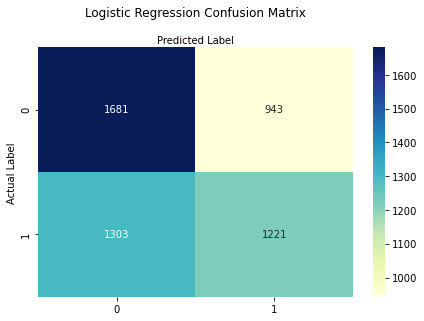

In [170]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Logistic Regression Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [171]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.5637140637140637
Precision: 0.5642329020332717
Recall: 0.4837559429477021


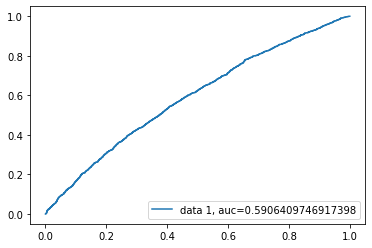

In [172]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Random Forest

Text(0.5, 257.44, 'Predicted Label')

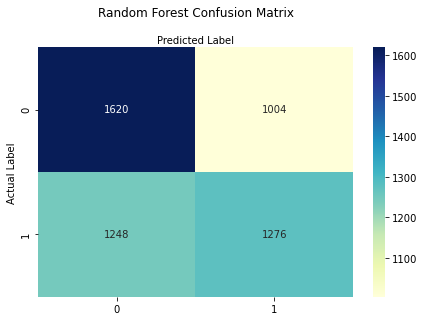

In [182]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=42, max_depth=5, n_estimators=200)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Random Forest Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [183]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.5625485625485626
Precision: 0.5596491228070175
Recall: 0.5055467511885895
